In [1]:
#import libraries
import numpy as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
207557,136731.0,1.983070,-1.943151,-1.209022,-1.168448,-1.460798,-0.600547,-0.855271,-0.166858,-1.063239,...,0.031589,0.503782,-0.093953,0.110638,0.156680,0.091419,-0.028341,-0.053297,150.50,0
234911,148168.0,-0.961485,-0.232488,-0.211663,0.141189,2.502645,-1.431114,0.661992,-0.060730,-0.564492,...,0.312723,0.651593,-0.053259,-0.412075,-0.197766,-0.731062,0.155192,0.224582,1.00,0
120959,76025.0,1.173162,-0.585456,0.484724,-0.025638,-0.545393,0.451585,-0.557020,0.099583,1.224027,...,-0.277662,-0.670592,-0.160597,-0.913874,0.312546,1.019852,-0.046000,0.013569,79.54,0
2932,2480.0,-0.637216,0.818898,2.476858,1.625758,-0.535449,0.893603,0.476518,-0.084538,0.706718,...,-0.284945,-0.202053,-0.027141,0.444241,-0.466326,-0.527447,-0.294065,-0.087452,49.00,0
200135,133299.0,-0.239658,1.025371,0.020229,-0.665025,1.272066,-0.758482,1.103485,-0.173237,-0.439549,...,-0.251801,-0.703335,-0.012826,0.497817,-0.535530,0.095162,0.109029,0.200431,1.29,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print(df.shape)

(284807, 31)


In [6]:
null_v=df.isnull().sum()
#null_v

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
#under sampling
legit_sample=legit.sample(n=492)
new_df=pd.concat([legit_sample,fraud],axis=0)

In [14]:
print(new_df.shape)

(984, 31)


In [15]:
x=new_df.drop(columns='Class',axis=1)
y=new_df['Class']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [17]:
#model training
model=LogisticRegression()

In [18]:
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
#accuracy 
x_train_pred=model.predict(x_train)

In [20]:
accuracy_score(x_train_pred,y_train)

0.9263024142312579

In [21]:
x_test_pred=model.predict(x_test)

In [22]:
accuracy_score(x_test_pred,y_test)

0.8984771573604061

In [23]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [24]:
#when train pred score > test pred score: overfitting

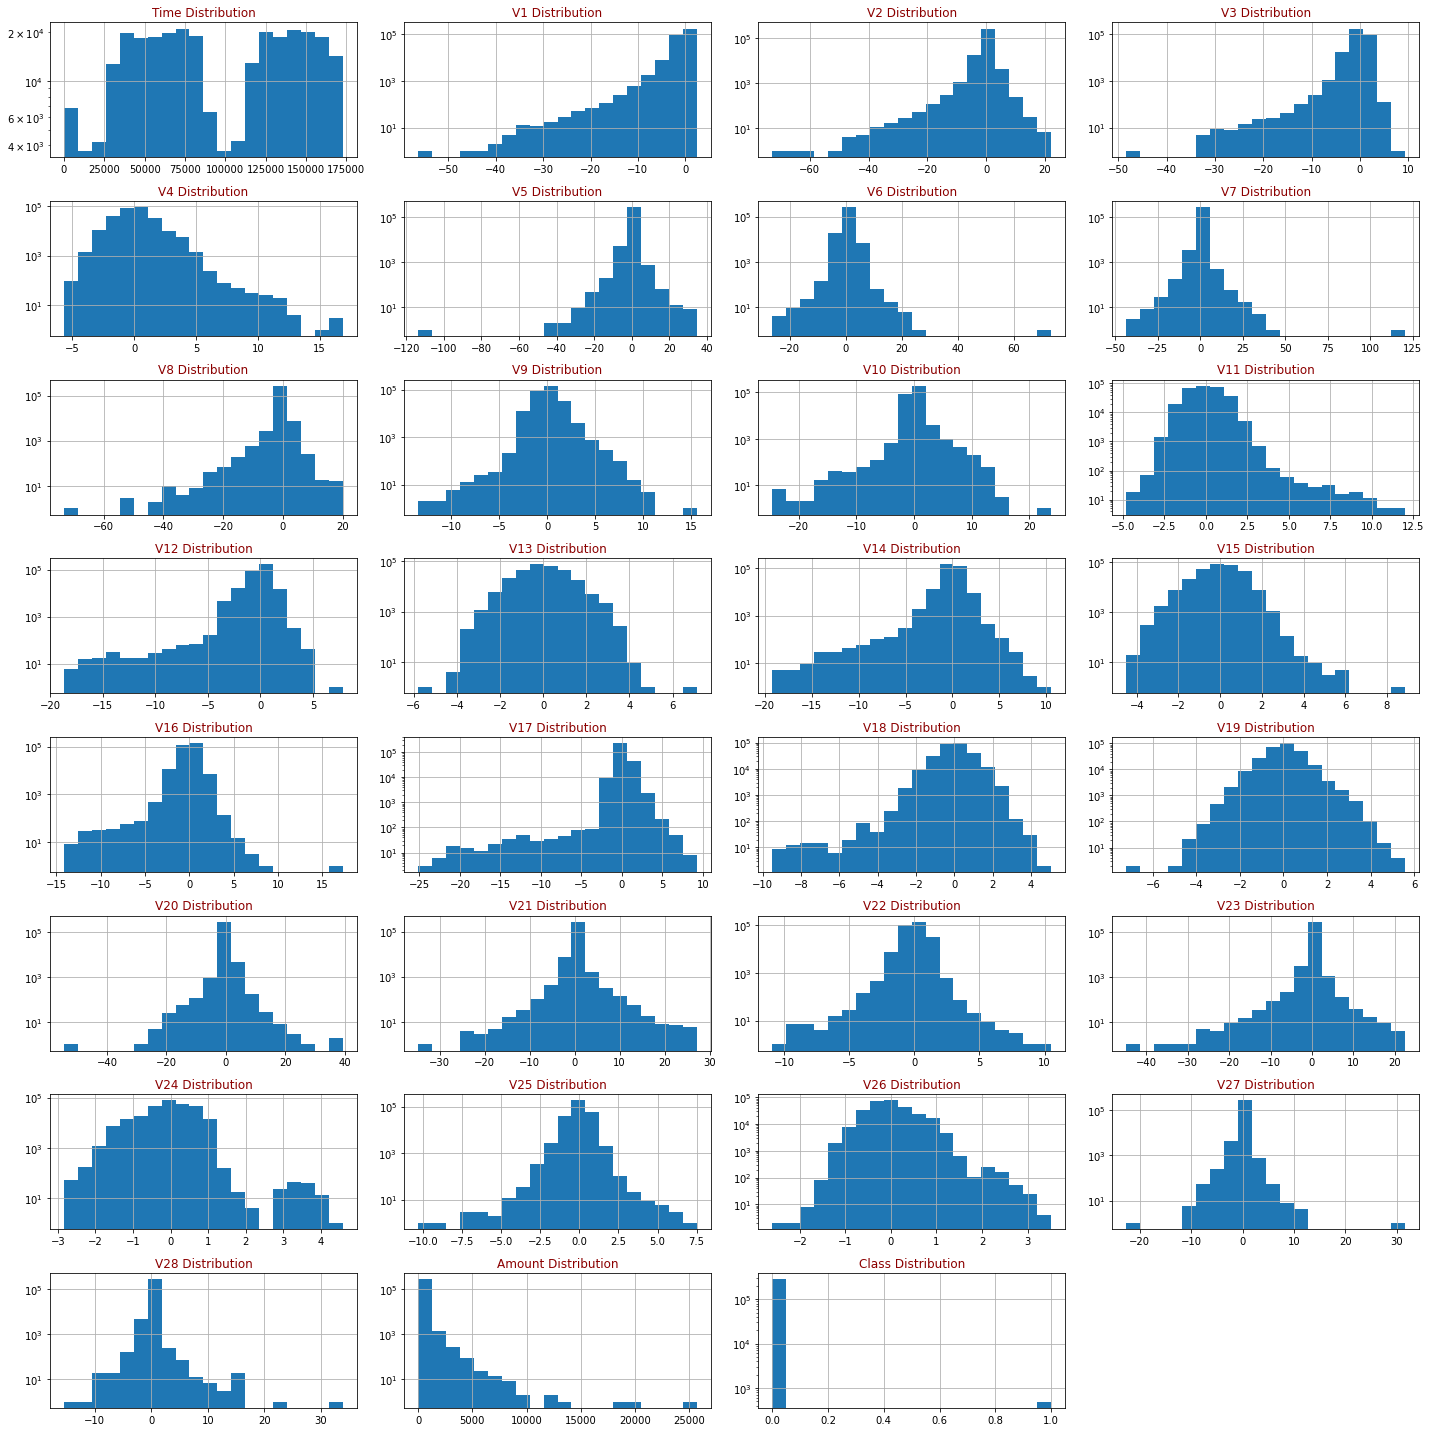

In [25]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8,4)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import numpy as np

In [27]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
log_class=LogisticRegression()

In [28]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_micro')
clf.fit(x_train,y_train)

C:\Users\sanyalam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.91866484        nan 0.93012174        nan 0.93012174
        nan 0.92884786        nan 0.93140369]
  warnings.warn(
C:\Users\sanyalam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_micro')

In [29]:
y_pred1=clf.predict(x_test)

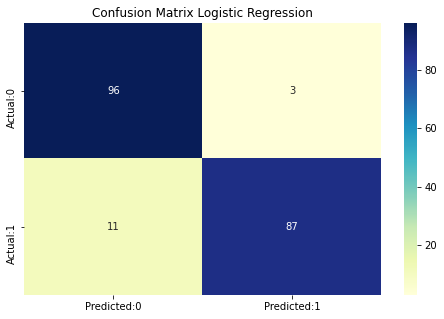

<Figure size 432x288 with 0 Axes>

In [44]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
axes=sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
axes.set_title('Confusion Matrix Logistic Regression')
plt.show()
plt.savefig('confusion_matrix.png')

In [31]:
print('The accuracy score using grid-search CV is : {}'.format(accuracy_score(y_test,y_pred1)))

The accuracy score using grid-search CV is : 0.9289340101522843


In [32]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        99
           1       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [33]:
#true positive, false negative

## PERFORMING UNDER SAMPLING

In [34]:
pip install imbalanced-learn

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [36]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_pred=rf_model.predict(x_test)

In [38]:
print('The accuracy score using random forest is : {}'.format(accuracy_score(y_test,y_pred)))

The accuracy score using random forest is : 0.9187817258883249


Text(0.5, 1.0, 'Confusion Matrix Random Forest Regressor')

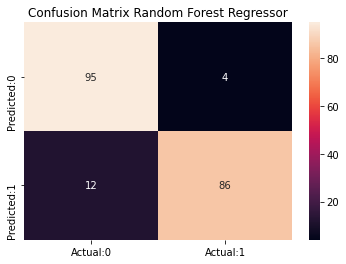

In [39]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Actual:0','Actual:1'],index=['Predicted:0','Predicted:1'])
axes=sns.heatmap(conf_matrix,annot=True)
axes.set_title('Confusion Matrix Random Forest Regressor')

In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       107
           1       0.88      0.96      0.91        90

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

